# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [7]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import matplotlib.mlab as mlab
import matplotlib




# Create two new dataframes

north_df = pd.read_csv('NorthCallCenter.csv')
north_df.head()



south_df = pd.read_csv('SouthCallCenter.csv')





In [6]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [16]:
df2 = pd.read_csv('SouthCallCenter.csv')
df2.head()
df2['Rep ID'].describe()


count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [8]:
# Put your EDA code here

north_df['Rep ID'].describe()


count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object

In [9]:
north_df['Busy Minutes'].describe()

count    245.000000
mean       9.987755
std        1.403980
min        8.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       12.000000
Name: Busy Minutes, dtype: float64

In [233]:
north_df['Not Ready Minutes'].describe()

count    245.000000
mean       1.914286
std        0.771416
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

In [10]:
north_df['Incoming Wait Time'].describe()


count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

In [11]:
north_df['During Call Wait Time'].describe()

count    245.000000
mean       2.967347
std        0.843827
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: During Call Wait Time, dtype: float64

In [236]:
south_df['Busy Minutes'].describe()

count    314.00000
mean      10.05414
std        1.40751
min        8.00000
25%        9.00000
50%       10.00000
75%       11.00000
max       12.00000
Name: Busy Minutes, dtype: float64

In [12]:
south_df['Not Ready Minutes'].describe()

count    314.000000
mean       1.910828
std        0.860016
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

In [238]:
south_df['Incoming Wait Time'].describe()

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

In [13]:
south_df['During Call Wait Time'].describe()

count    314.000000
mean       3.076433
std        0.819424
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: During Call Wait Time, dtype: float64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [14]:
1. There are 9 reps in the north branch and 11 reps in the south branch. 
2. For the North Branch, the average Busy Minutes is 9.98 minutes, 1.91 minutes for Not Ready Minutes,3.04 minutes for Incoming Wait Time, and 2.96 minutes for During Call Wait Time. 
2b. For the South Branch, 10.5 minutes is the average Busy Minutes, 1.91 minutes for Not Ready Minutes,3.00 minutes for Incoming Wait Time, and 3.07 minutes for During Call Wait Time.
3. For the North Branch, there were 245 calls in the Busy Minutes section, 245 calls in the Not Ready Minutes, 82 calls in the Incoming Wait Time, and 245 calls in the During Call Wait Time section. 
3b. For the South Branch, there were 314 calls in the Busy Minutes section, 314 calls in the Not Ready Minutes,126 calls in the Incoming Wait Time, and 314 calls in the During Call Wait Time section. 

SyntaxError: invalid syntax (<ipython-input-14-a341df9f91e4>, line 1)

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [15]:
# Clean your data here

north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(-999)

#heatmap
#cols = df.columns[:100] # first 30 columns
#colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
#sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#percentage list

for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



#north_df
#North Branch 

#Find how many nulls relate to outgoing calls. My hunch is yes. 

#north_df.count()













Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%


In [16]:
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].replace({'_MISSING_': -999})


In [17]:
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,-999.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,-999.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,-999.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,-999.0,2,1


<AxesSubplot:>

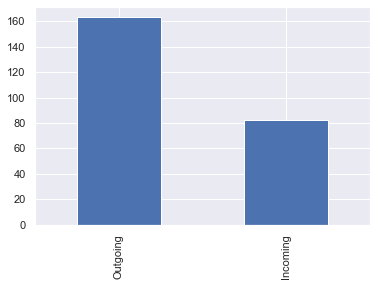

In [244]:
north_df['Incoming or Outgoing'].value_counts().plot.bar()

<AxesSubplot:>

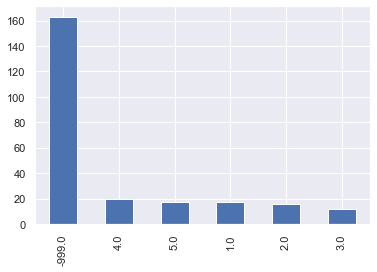

In [245]:
north_df['Incoming Wait Time'].value_counts().plot.bar()

In [18]:
num_rows = len(north_df.index)
low_information_cols = [] #

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    245
Name: Branch, dtype: int64

Sale: 95.51020%
NO      234
YES      10
YES       1
Name: Sale, dtype: int64

Lost Call: 97.95918%
0    240
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.14286%
0    238
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    245
Name: Calls, dtype: int64



In [19]:
#Find duplicates



north_df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [251]:
north_df.duplicated().sum()

0

In [252]:
north_df['Sale'].describe()

count     245
unique      3
top        NO
freq      234
Name: Sale, dtype: object

In [20]:
north_df_dropped = north_df.drop(columns=['Time Block'])

north_df_dropped.head()


,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [254]:
#north_df.loc['Product Support']

In [255]:
#South Branch

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [21]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [22]:
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(-999)
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [23]:
south_df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [24]:
#Find Duplicates

#No there are no duplicates.


duplicate_rows_df = south_df[south_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [25]:
south_df['Sale'].describe()


count     314
unique      2
top        NO
freq      308
Name: Sale, dtype: object

In [26]:
south_df_dropped = south_df.drop(columns=['Time Block'])

south_df_dropped.head()


,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [262]:
#1.All of the null values correspond to outgoing calls. This makes sense because there is not incoming wait time if the calls are outgoing.
#2. One of the "Yes" values is for product support and the others are for sales support. 
#3. There are no duplicates in the data sets. I did not need to remove any.
#4. I removed the Time Block column because I didn't think it was relevant to the business need. 

In [27]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     245 non-null    float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [28]:
pd.concat([north_df_dropped, south_df_dropped], axis=0)

,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,Outgoing,D,Helga,NO,0,0,10,3,-999.0,4,1
310,310,South,Product Support,Outgoing,C,Susan,NO,0,0,12,3,-999.0,4,1
311,311,South,Product Support,Outgoing,C,Sandy,NO,0,0,9,3,-999.0,4,1
312,312,South,Product Support,Outgoing,C,Eric,NO,0,0,10,1,-999.0,2,1


In [277]:
#pd.set_option('display.max_rows', None)

In [29]:
df = pd.concat([north_df_dropped, south_df_dropped], axis=0)
df

,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,Outgoing,D,Helga,NO,0,0,10,3,-999.0,4,1
310,310,South,Product Support,Outgoing,C,Susan,NO,0,0,12,3,-999.0,4,1
311,311,South,Product Support,Outgoing,C,Sandy,NO,0,0,9,3,-999.0,4,1
312,312,South,Product Support,Outgoing,C,Eric,NO,0,0,10,1,-999.0,2,1


In [30]:
# Manipulate data here

df.groupby(['Rep ID', 'Branch']).sum().sort_values(by=['Calls'])



,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Alice,South,3637,0,0,199,46,-13971.0,58,20
Amanda,North,2666,0,1,229,43,-17970.0,60,23
Andy,North,2494,0,3,228,43,-12951.0,65,23
Cam,North,2746,1,0,233,46,-12955.0,66,24
Xander,North,3340,1,0,244,44,-17962.0,68,24
Sharon,South,4226,1,1,257,38,-16954.0,77,25
Josh,South,3960,3,0,260,50,-16952.0,83,26
Susan,South,4006,2,0,267,53,-13951.0,88,26
Joe,North,3178,0,0,256,49,-15948.0,81,26


In [31]:
df.groupby(['Branch']).mean().sort_values(by=['Abandoned'])

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,
South,156.5,0.035032,0.012739,10.054140,1.910828,-596.923567,3.076433,1.0
North,122.0,0.020408,0.028571,9.987755,1.914286,-663.620408,2.967347,1.0


In [32]:
df.mean()

Unnamed: 0               141.379249
Lost Call                  0.028623
Abandoned                  0.019678
Busy Minutes              10.025045
Not Ready Minutes          1.912343
Incoming Wait Time      -626.155635
During Call Wait Time      3.028623
Calls                      1.000000
dtype: float64

In [112]:
pd.set_option('display.max_columns', None)

In [113]:
df.groupby(['Branch']).describe()

Unnamed: 0                                                      \
            count   mean        std  min    25%    50%     75%    max   
Branch                                                                  
North       245.0  122.0  70.869599  0.0  61.00  122.0  183.00  244.0   
South       314.0  156.5  90.788215  0.0  78.25  156.5  234.75  313.0   

       Lost Call                                              Abandoned  \
           count      mean       std  min  25%  50%  75%  max     count   
Branch                                                                    
North      245.0  0.020408  0.141681  0.0  0.0  0.0  0.0  1.0     245.0   
South      314.0  0.035032  0.184154  0.0  0.0  0.0  0.0  1.0     314.0   

                                                    Busy Minutes             \
            mean       std  min  25%  50%  75%  max        count       mean   
Branch                                                                        
North   0.028571  0.166940  0.0  0.0  0.0  0.0  1.0        245.0   9.987755   
South   0.012739  0.112324  0.0  0.0  0.0  0.0  1.0        314.0  10.054140   

                                            Not Ready Minutes            \
            std  min  25%   50%   75%   max             count      mean   
Branch                                                                    
North   1.40398  8.0  9.0  10.0  11.0  12.0             245.0  1.914286   
South   1.40751  8.0  9.0  10.0  11.0  12.0             314.0  1.910828   

                                          Incoming Wait Time              \
             std  min  25%  50%  75%  max              count        mean   
Branch                                                                     
North   0.771416  1.0  1.0  2.0  3.0  3.0              245.0 -663.620408   
South   0.860016  1.0  1.0  2.0  3.0  3.0              314.0 -596.923567   

                                                  During Call Wait Time  \
               std    min    25%    50%  75%  max                 count   
Branch                                                                    
North   473.818832 -999.0 -999.0 -999.0  2.0  5.0                 245.0   
South   491.921200 -999.0 -999.0 -999.0  2.0  5.0                 314.0   

                                                     Calls                 \
            mean       std  min  25%  50%  75%  max  count mean  std  min   
Branch                                                                      
North   2.967347  0.843827  2.0  2.0  3.0  4.0  4.0  245.0  1.0  0.0  1.0   
South   3.076433  0.819424  2.0  2.0  3.0  4.0  4.0  314.0  1.0  0.0  1.0   

                            
        25%  50%  75%  max  
Branch                      
North   1.0  1.0  1.0  1.0  
South   1.0  1.0  1.0  1.0

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [35]:
1. Brent has the highest calls (37) from the North Branch and Eric has the highest calls (35) from the South Branch.
2. The South Branch has an average of 1% abandoned calls which is lower than the 2-5% optimal range. The North Branch has an 2.8% abandoned calls rate which is within the optimal range. 
2b. The companies average abandoned call rate is 1.9% which is relatively close to the 2% optimal range point.
3. The percentage of calls answered within 2 secconds for each branch and the entire company is 25%.
4. The average speed of answer for the North Branch is 2.96 seconds, for the South Branch it's 3.07 seconds. And for the entire company the average speed of answer is 3.01 seconds. 

SyntaxError: invalid syntax (<ipython-input-35-3b00d3dec4df>, line 1)

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [36]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

queue_dict


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,,
A,11084,1,4,946,181,-59824.0,272,96
B,18806,4,3,1501,288,-102763.0,455,149
C,21602,4,1,1409,251,-80759.0,435,138
D,27539,7,3,1748,349,-106675.0,531,176


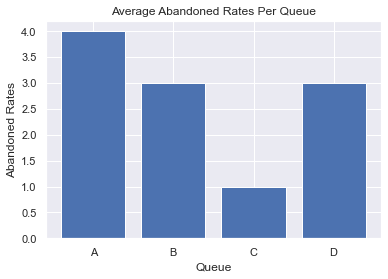

In [37]:
import matplotlib.pyplot as plt
import numpy as np




#plt.bar(queue_dict).mean()

x = np.array(['A', 'B', 'C', 'D'])
y = np.array([4, 3, 1, 3])
#plt.barh(queue, color = ['#F0F8FF','#E6E6FA','#B0E0E6', '#B0E0E3']) 

plt.bar(x,y)

plt.xlabel("Queue") # Text for X-Axis
plt.ylabel("Abandoned Rates") # Text for Y-Axis
plt.title("Average Abandoned Rates Per Queue")
#plt.yticks(np.arange(y.min(0), y.max(4), 1))
plt.show()

#DESCRIPTION
#I chose this bar graph because it's the easiest to view trends.


In [111]:
# Create visualization 2 here - 2. What is the service level and average speed of answer per each rep?


# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
purpose_group = df.groupby("Call Purpose")
call_purposes = ["Complain", "Product Support", "Sales Support"]


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100



In [82]:
service_level["Service Level %"]

Rep ID
Amanda    420.000000
Andy      160.000000
Brent     437.500000
Cam       163.636364
Duke      150.000000
Joe       180.000000
Lilly     183.333333
Todd      416.666667
Xander    333.333333
Name: Service Level %, dtype: float64

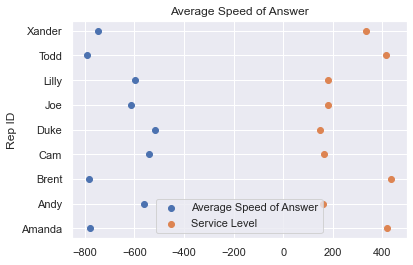

In [110]:
import matplotlib.pyplot as plt
import numpy as np
  
# creating two array for plotting
y1 = np.array(["Amanda", "Andy", "Brent", "Cam", "Duke", "Joe", "Lilly", "Todd", "Xander"])
x1 = np.array([-781.304348, -563.086957, -782.540541,-539.791667,-515.379310
, -613.384615, -598.166667, -791.586207, -748.416667])
#plt.barh(queue, color = ['#F0F8FF','#E6E6FA','#B0E0E6', '#B0E0E3']) 

#plt.bar(y, x)

#plt.xlabel("Rep ID") # Text for X-Axis
plt.ylabel("Rep ID") # Text for Y-Axis
plt.title("Average Speed of Answer")
#plt.yticks(np.arange(y.min(0), y.max(4), 1))
#plt.show()



y2 = np.array(["Amanda", "Andy", "Brent", "Cam", "Duke", "Joe", "Lilly", "Todd", "Xander"])
x2 = np.array([420, 160, 437.5,163.6,150
,180, 183.333, 416.666, 333.3333])
#plt.barh(queue, color = ['#F0F8FF','#E6E6FA','#B0E0E6', '#B0E0E3']) 

#plt.bar(y, x)

#plt.x2label("Rep ID") # Text for X-Axis
#plt.y2label("Service Level") # Text for Y-Axis
#plt.title("Average Service Level")
#plt.yticks(np.arange(y.min(0), y.max(4), 1))
#plt.show()
  
# creating scatter plot with both negative 
# and positive axes
plt.scatter(x1, y1)
plt.scatter(x2,y2)

plt.legend(["Average Speed of Answer", "Service Level"])
  
# visualizing the plot using plt.show() function
plt.show()

#DESCRIPTION
#I chose this scatter plot because it allows me to plot positive 
#and negative values.

In [89]:
# Create visualization 3 here - 3. For each type of call purpose, how many calls are outgoing vs. incoming?
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#complaints - incoming 51
#sales_support - {'Outgoing': 123, 'Incoming': 75}
#product_support - {'Outgoing': 228, 'Incoming': 82}




In [92]:
y = np.array(["Amanda", "Andy", "Brent", "Cam", "Duke", "Joe", "Lilly", "Todd", "Xander"])
x = np.array([420, 160, 437.5,163.6,150
,180, 183.333, 416.666, 333.3333])
#plt.barh(queue, color = ['#F0F8FF','#E6E6FA','#B0E0E6', '#B0E0E3']) 

plt.bar(y, x)

plt.xlabel("Rep ID") # Text for X-Axis
plt.ylabel("Service Level") # Text for Y-Axis
plt.title("Average Service Level")
#plt.yticks(np.arange(y.min(0), y.max(4), 1))
plt.show()

{'Outgoing': 228, 'Incoming': 82}

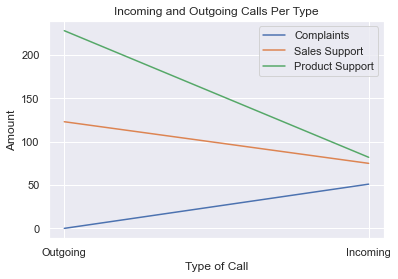

In [114]:
x1 = ["Outgoing", "Incoming"]
y1 = [0, 51]

x2 = ["Outgoing", "Incoming"]
y2 = [123, 75]


x3 = ["Outgoing", "Incoming"]
y3 = [228, 82]

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.xlabel("Type of Call") # Text for X-Axis
plt.ylabel("Amount") # Text for Y-Axis
plt.title("Incoming and Outgoing Calls Per Type")

plt.legend(["Complaints", "Sales Support", "Product Support"])

#DESCRIPTION
#I chose this chart because it allows me to show the different types of calls 
#(outgoing and incoming) for each category of calls (complains, sales 
#support, product support) This way you can easily identify which had the 
#most outgoing calls and that they all had a much closer amounnt of incoming 
#calls. There's actually less incoming calls for complaints than other types 
#of calls. 

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

In [ ]:
#Chart 1
#I chose this bar graph because it's the easiest to view trends.

#Chart 2
#I chose this scatter plot because it allows me to plot positive 
#and negative values.

#Chart 3
#I chose this chart because it allows me to show the different types of calls 
#(outgoing and incoming) for each category of calls (complains, sales 
#support, product support) This way you can easily identify which had the 
#most outgoing calls and that they all had a much closer amounnt of incoming 
#calls. There's actually less incoming calls for complaints than other types 
#of calls. 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
